<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Laboratorio-1:-Regresión-en-Boston" data-toc-modified-id="Laboratorio-1:-Regresión-en-Boston-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Laboratorio 1: Regresión en Boston</a></span><ul class="toc-item"><li><span><a href="#Carga-del-Conjunto-de-Datos" data-toc-modified-id="Carga-del-Conjunto-de-Datos-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Carga del Conjunto de Datos</a></span></li><li><span><a href="#División-en-Entrenamiento-y-Evaluación" data-toc-modified-id="División-en-Entrenamiento-y-Evaluación-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>División en Entrenamiento y Evaluación</a></span></li><li><span><a href="#Ejercicio-1:-Descripción-de-los-Datos-y-la-Tarea" data-toc-modified-id="Ejercicio-1:-Descripción-de-los-Datos-y-la-Tarea-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Ejercicio 1: Descripción de los Datos y la Tarea</a></span></li><li><span><a href="#Ejercicio-2:-Visualización-de-los-Datos" data-toc-modified-id="Ejercicio-2:-Visualización-de-los-Datos-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Ejercicio 2: Visualización de los Datos</a></span></li><li><span><a href="#Ejercicio-3:-Regresión-Lineal" data-toc-modified-id="Ejercicio-3:-Regresión-Lineal-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Ejercicio 3: Regresión Lineal</a></span></li><li><span><a href="#Ejercicio-4:-Regresión-Polinomial" data-toc-modified-id="Ejercicio-4:-Regresión-Polinomial-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Ejercicio 4: Regresión Polinomial</a></span></li><li><span><a href="#Ejercicio-5:-Regresión-con-más-de-un-Atributo" data-toc-modified-id="Ejercicio-5:-Regresión-con-más-de-un-Atributo-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Ejercicio 5: Regresión con más de un Atributo</a></span></li><li><span><a href="#Más-ejercicios-(opcionales)" data-toc-modified-id="Más-ejercicios-(opcionales)-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Más ejercicios (opcionales)</a></span><ul class="toc-item"><li><span><a href="#Ejercicio-7:-A-Todo-Feature" data-toc-modified-id="Ejercicio-7:-A-Todo-Feature-1.8.1"><span class="toc-item-num">1.8.1&nbsp;&nbsp;</span>Ejercicio 7: A Todo Feature</a></span></li><li><span><a href="#Ejercicio-8:-Regularización" data-toc-modified-id="Ejercicio-8:-Regularización-1.8.2"><span class="toc-item-num">1.8.2&nbsp;&nbsp;</span>Ejercicio 8: Regularización</a></span></li></ul></li></ul></li></ul></div>

# Laboratorio 1: Regresión en Boston

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "Boston house prices dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [78]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib.colors import ListedColormap
from sklearn.datasets import load_boston, load_breast_cancer, load_iris
from sklearn.linear_model import LinearRegression, LogisticRegression, Perceptron, Ridge
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


#from ml.visualization import plot_confusion_matrix, classifier_boundary

np.random.seed(1234)  # Setup seed to be more deterministic

%matplotlib inline

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [37]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [38]:
# print(boston['DESCR'])   # descripción del dataset
# boston['data']           # matriz con los datos de entrada (atributos)
# boston['target']         # vector de valores a predecir
# boston['feature_names']  # nombres de los atributos para cada columna de 'data'

In [39]:
boston['data'].shape, boston['target'].shape

((506, 13), (506,))

## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [40]:
from sklearn.model_selection import train_test_split
X, y = boston['data'], boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((404, 13), (102, 13))

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

**No hace falta escribir código para responder estas preguntas.**

In [41]:
boston_tabla = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_tabla.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [42]:
# El atributo DESCR que nos proporciona su descripción
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

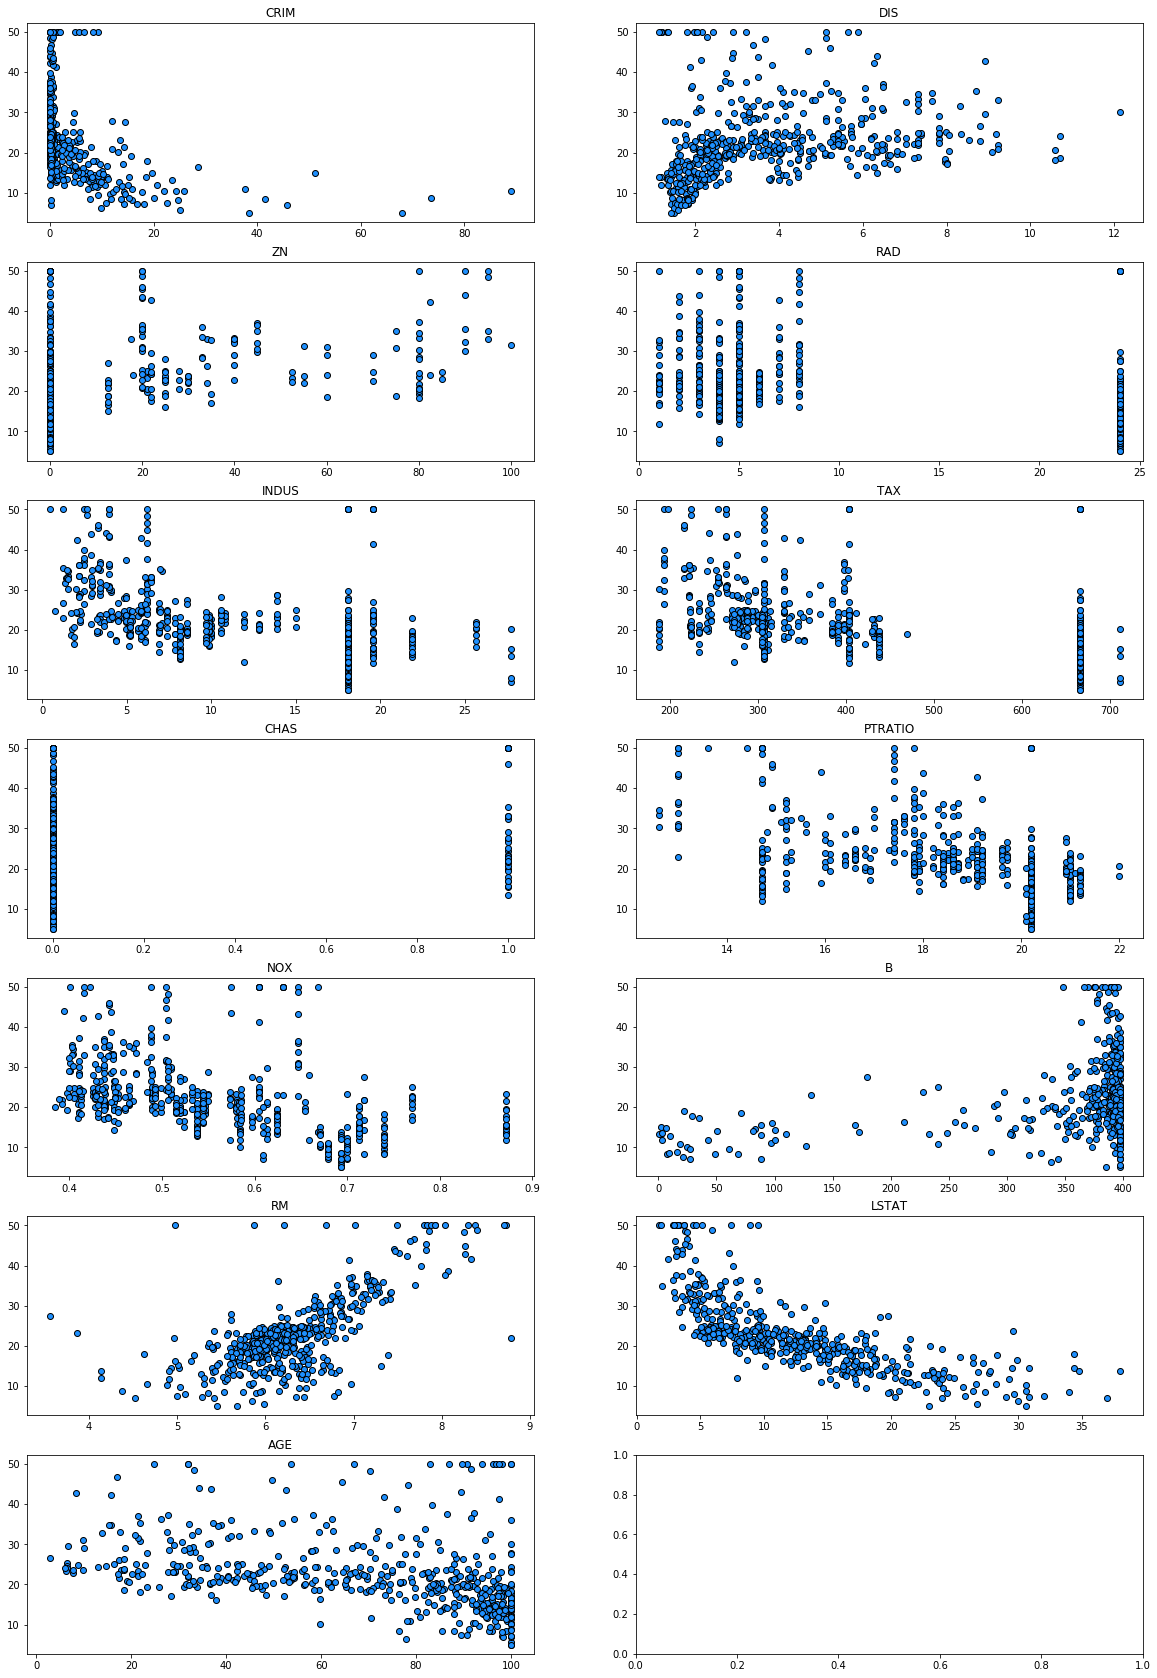

In [43]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(7,2, figsize=(20,30))
feature_files = boston['data'].T

for indice in range(len(feature_files)):
  #feature = 'CRIM'
  #selector = feature_files[indice]
  ax[indice%7][indice//7].scatter(feature_files[indice], y, facecolor="dodgerblue", edgecolor="k", label="datos")
  ax[indice%7][indice//7].set_title(boston['feature_names'][indice])
plt.show()

In [44]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

In [45]:
# Seleccionamos un atributo de los listados en la descripción que no sea categórico: EN ESTE CASO SELECCIONAMOS LSTAT
feature_map = {feature: idx for idx, feature in enumerate(boston['feature_names'])}
selected_feature = 'LSTAT'#'RM'#'LSTAT' 
feature_col = feature_map[selected_feature]
X_train_f = X_train[:, feature_col].reshape(-1, 1) 
X_test_f = X_test[:, feature_col].reshape(-1, 1)

In [46]:
# Entrenamos un clasificador utilizando sólo ese atributo sobre el conjunto de entrenamiento (X_train, y_train)
model = LinearRegression()
model.fit(X_train_f, y_train)

# Evaluamos el desempeño del clasificador utilizando la media del error cuadrado (MSE o mean squared error)
# sobre el conjunto de datos de entrenamiento (X_train, y_train) y lo comparamos con el de validación (X_test, y_test)
# Mientras más cercano a cero mejor --
print('Media del error cuadrado para entrenamiento del atributo seleccionado: %.2f' % 
      mean_squared_error(y_train, model.predict(X_train_f)))
print('Media del error cuadrado para validación del atributo seleccionado: %.2f' %
      mean_squared_error(y_test, model.predict(X_test_f)))

Media del error cuadrado para entrenamiento del atributo seleccionado: 36.52
Media del error cuadrado para validación del atributo seleccionado: 46.34


In [47]:
#x_start = min(np.min(X_train_f), np.min(X_test_f))
#x_end = max(np.max(X_train_f), np.max(X_test_f))
#x = np.linspace(x_start, x_end, 200).reshape(-1, 1)
## plt.plot(x, model.predict(x), color="tomato", label="modelo")

#plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
#plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
#plt.title(feature)
#plt.legend()
#plt.show()

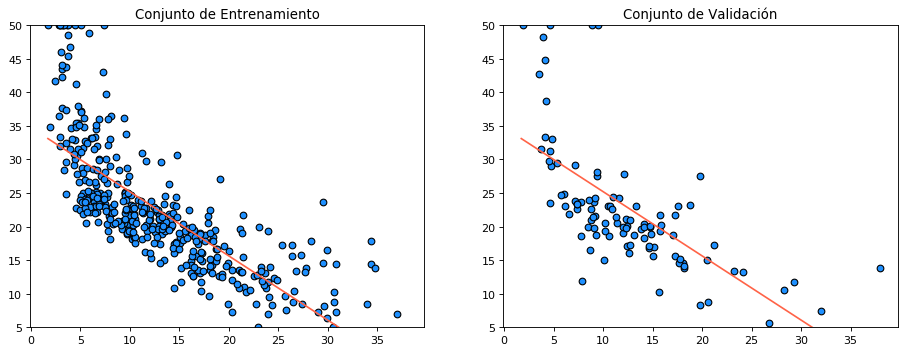

In [48]:
plt.figure(figsize=(14, 5), dpi= 80, facecolor='w', edgecolor='k')

X_range_start = np.min(np.r_[X_train_f, X_test_f])
X_range_stop = np.max(np.r_[X_train_f, X_test_f])
y_range_start = np.min(np.r_[y_train, y_test])
y_range_stop = np.max(np.r_[y_train, y_test])
X_linspace = np.linspace(X_range_start, X_range_stop, 200).reshape(-1, 1)

# Conjunto de entrenamiento
plt.subplot(1, 2, 1)
plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.plot(X_linspace, model.predict(X_linspace), color="tomato", label="modelo")
plt.ylim(y_range_start, y_range_stop)
plt.title("Conjunto de Entrenamiento")

# Conjunto de validación
plt.subplot(1, 2, 2)
plt.scatter(X_test_f, y_test, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.plot(X_linspace, model.predict(X_linspace), color="tomato", label="modelo")
plt.ylim(y_range_start, y_range_stop)
plt.title("Conjunto de Validación")

plt.show()

In [49]:
Entrenamiento=[]
Validacion =[]
Err_entrenamiento=mean_squared_error(y_train, model.predict(X_train_f))
Err_validacion=mean_squared_error(y_test, model.predict(X_test_f))
Entrenamiento.append(round(Err_entrenamiento,2))
Validacion.append(round(Err_validacion,2))

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

In [50]:
def regression_plots(models, *args, poly_features=None):
    #plt.figure(figsize=(14, 5), dpi= 80, facecolor='w', edgecolor='k')
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), dpi= 80, facecolor='w', edgecolor='k')
    
    X_train_f, X_test_f, y_train, y_test = args
    X_range_start = np.min(np.r_[X_train_f, X_test_f])
    X_range_stop = np.max(np.r_[X_train_f, X_test_f])
    y_range_start = np.min(np.r_[y_train, y_test])
    y_range_stop = np.max(np.r_[y_train, y_test])
    X_linspace = np.linspace(X_range_start, X_range_stop, 200).reshape(-1, 1)
    if poly_features is not None:
        X_linspace_p = [pf.transform(X_linspace) for pf in poly_features]
    else:
        X_linspace_p = [X_linspace for _ in range(len(models))]
        
    # Conjunto de entrenamiento
    ax1.scatter(X_train_f, y_train, facecolor="azure", edgecolor="k")
    ax1.set_ylim(y_range_start, y_range_stop)
    ax1.set_title("Conjunto de Entrenamiento")

    # Conjunto de validación
    ax2.scatter(X_test_f, y_test, facecolor="azure", edgecolor="k")
    ax2.set_ylim(y_range_start, y_range_stop)
    ax2.set_title("Conjunto de Validación")

    for i, (model, model_name) in enumerate(models):
        ax1.plot(X_linspace, model.predict(X_linspace_p[i]), label=model_name)
        ax2.plot(X_linspace, model.predict(X_linspace_p[i]), label=model_name)
    
    ax1.legend()
    ax2.legend()

++++++++++ Pol Regr N=1 ++++++++++
Media del error cuadrado para entrenamiento: 36.52
Media del error cuadrado para validación: 46.34
++++++++++ Pol Regr N=2 ++++++++++
Media del error cuadrado para entrenamiento: 28.19
Media del error cuadrado para validación: 38.85
++++++++++ Pol Regr N=3 ++++++++++
Media del error cuadrado para entrenamiento: 26.78
Media del error cuadrado para validación: 37.22
++++++++++ Pol Regr N=4 ++++++++++
Media del error cuadrado para entrenamiento: 25.85
Media del error cuadrado para validación: 34.70
++++++++++ Pol Regr N=5 ++++++++++
Media del error cuadrado para entrenamiento: 25.03
Media del error cuadrado para validación: 34.83
++++++++++ Pol Regr N=6 ++++++++++
Media del error cuadrado para entrenamiento: 25.01
Media del error cuadrado para validación: 34.33


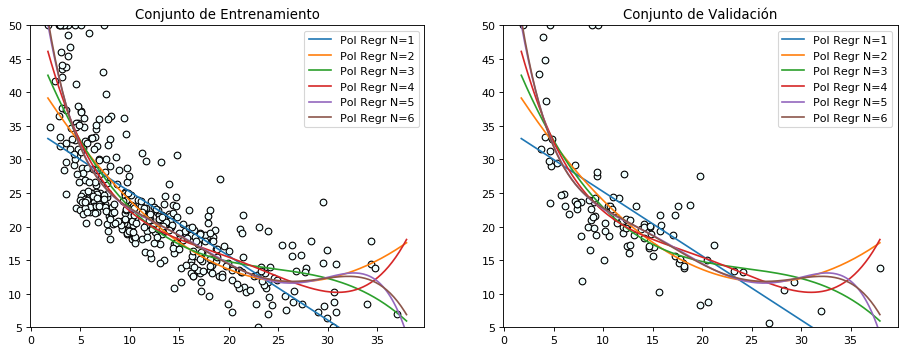

In [51]:
polynomial_degree = 4


models = []
models_name = []
poly_features = []
for polynomial_degree in [1,2,3,4,5,6]:
    poly_features.append( PolynomialFeatures(polynomial_degree))
    poly_features[-1].fit(X_train_f)
    X_poly_train = poly_features[-1].transform(X_train_f)
    X_poly_test = poly_features[-1].transform(X_test_f)

    models.append(LinearRegression())
    models[-1].fit(X_poly_train, y_train)
    models_name.append(f"Pol Regr N={polynomial_degree}")
    print("+"*10,models_name[-1],"+"*10)
    print('Media del error cuadrado para entrenamiento: %.2f' % 
          mean_squared_error(y_train, models[-1].predict(X_poly_train)))
    print('Media del error cuadrado para validación: %.2f' %
          mean_squared_error(y_test, models[-1].predict(X_poly_test)))
# Plots
args = (X_train_f, X_test_f, y_train, y_test)
regression_plots(list(zip(models, models_name)), *args, poly_features=poly_features)

#regression_plots(X_train_feature, X_val_feature, y_train, y_val, model, poly_features)

In [52]:
print('Grado 1')
polynomial_degree = 1 # TODO: Probar distintos grados del polinomio

poly_features = PolynomialFeatures(polynomial_degree)
poly_features.fit(X_train_f)
X_poly_train = poly_features.transform(X_train_f)
X_poly_test = poly_features.transform(X_test_f)

model = LinearRegression()
model.fit(X_poly_train, y_train)

print('Media del error cuadrado para entrenamiento: %.2f' % 
      mean_squared_error(y_train, model.predict(X_poly_train)))
print('Media del error cuadrado para validación: %.2f' %
      mean_squared_error(y_test, model.predict(X_poly_test)))


Grado 1
Media del error cuadrado para entrenamiento: 36.52
Media del error cuadrado para validación: 46.34


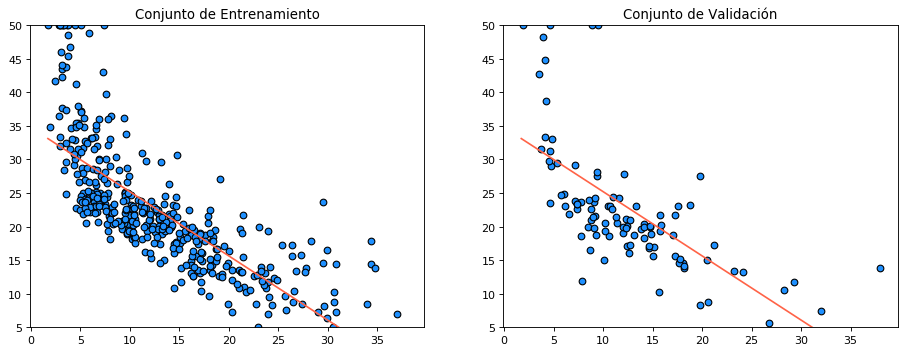

In [53]:
# EL SELECCIONADO POLINOMIO 
plt.figure(figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')

X_range_start = np.min(np.r_[X_train_f, X_test_f])
X_range_stop = np.max(np.r_[X_train_f, X_test_f])
y_range_start = np.min(np.r_[y_train, y_test])
y_range_stop = np.max(np.r_[y_train, y_test])
X_linspace = np.linspace(X_range_start, X_range_stop, 200).reshape(-1, 1)
X_linspace_poly = poly_features.transform(X_linspace)

# Conjunto de entrenamiento
plt.subplot(1, 2, 1)
plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.plot(X_linspace, model.predict(X_linspace_poly), color="tomato", label="modelo")
plt.ylim(y_range_start, y_range_stop)
plt.title("Conjunto de Entrenamiento")

# Conjunto de validación
plt.subplot(1, 2, 2)
plt.scatter(X_test_f, y_test, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.plot(X_linspace, model.predict(X_linspace_poly), color="tomato", label="modelo")
plt.ylim(y_range_start, y_range_stop)
plt.title("Conjunto de Validación")

plt.show()

In [54]:
print('Grado 2')
polynomial_degree = 2 # TODO: Probar distintos grados del polinomio

poly_features = PolynomialFeatures(polynomial_degree)
poly_features.fit(X_train_f)
X_poly_train = poly_features.transform(X_train_f)
X_poly_test = poly_features.transform(X_test_f)

model = LinearRegression()
model.fit(X_poly_train, y_train)

print('Media del error cuadrado para entrenamiento: %.2f' % 
      mean_squared_error(y_train, model.predict(X_poly_train)))
print('Media del error cuadrado para validación: %.2f' %
      mean_squared_error(y_test, model.predict(X_poly_test)))


Grado 2
Media del error cuadrado para entrenamiento: 28.19
Media del error cuadrado para validación: 38.85


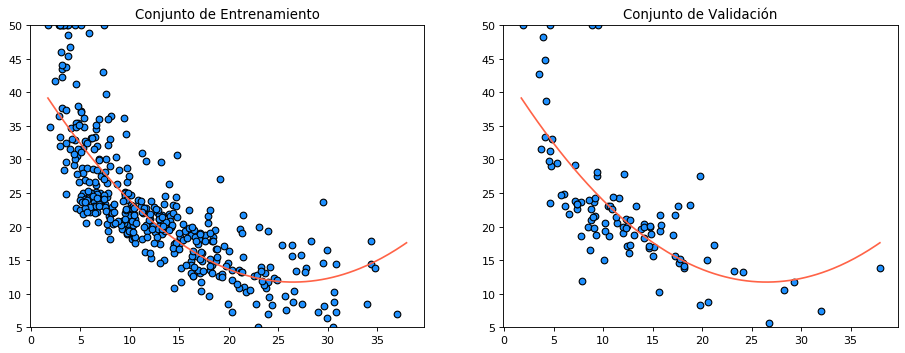

In [55]:
# EL SELECCIONADO POLINOMIO 
plt.figure(figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')

X_range_start = np.min(np.r_[X_train_f, X_test_f])
X_range_stop = np.max(np.r_[X_train_f, X_test_f])
y_range_start = np.min(np.r_[y_train, y_test])
y_range_stop = np.max(np.r_[y_train, y_test])
X_linspace = np.linspace(X_range_start, X_range_stop, 200).reshape(-1, 1)
X_linspace_poly = poly_features.transform(X_linspace)

# Conjunto de entrenamiento
plt.subplot(1, 2, 1)
plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.plot(X_linspace, model.predict(X_linspace_poly), color="tomato", label="modelo")
plt.ylim(y_range_start, y_range_stop)
plt.title("Conjunto de Entrenamiento")

# Conjunto de validación
plt.subplot(1, 2, 2)
plt.scatter(X_test_f, y_test, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.plot(X_linspace, model.predict(X_linspace_poly), color="tomato", label="modelo")
plt.ylim(y_range_start, y_range_stop)
plt.title("Conjunto de Validación")

plt.show()

In [56]:
Err_entrenamiento=[]
Err_validacion=[]
Err_entrenamiento=mean_squared_error(y_train, model.predict(X_poly_train))
Err_validacion=mean_squared_error(y_test, model.predict(X_poly_test))
Entrenamiento.append(round(Err_entrenamiento,2))
Validacion.append(round(Err_validacion,2))

In [57]:

print('Grado 3')
polynomial_degree = 3 # TODO: Probar distintos grados del polinomio

poly_features = PolynomialFeatures(polynomial_degree)
poly_features.fit(X_train_f)
X_poly_train = poly_features.transform(X_train_f)
X_poly_test = poly_features.transform(X_test_f)

model = LinearRegression()
model.fit(X_poly_train, y_train)

print('Media del error cuadrado para entrenamiento: %.2f' % 
      mean_squared_error(y_train, model.predict(X_poly_train)))
print('Media del error cuadrado para validación: %.2f' %
      mean_squared_error(y_test, model.predict(X_poly_test)))


Grado 3
Media del error cuadrado para entrenamiento: 26.78
Media del error cuadrado para validación: 37.22


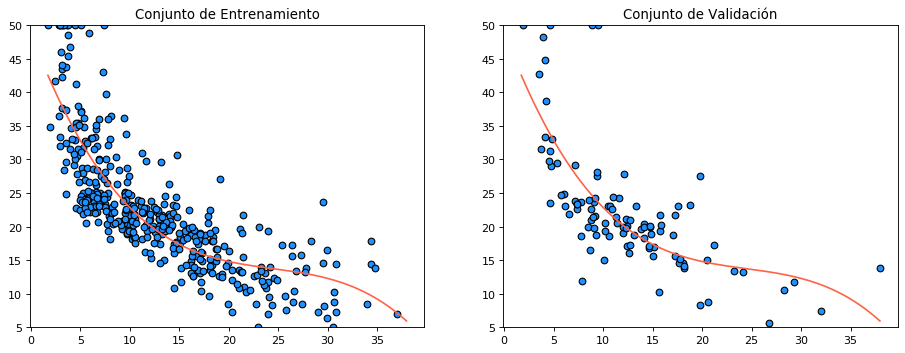

In [58]:
# EL SELECCIONADO POLINOMIO 
plt.figure(figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')

X_range_start = np.min(np.r_[X_train_f, X_test_f])
X_range_stop = np.max(np.r_[X_train_f, X_test_f])
y_range_start = np.min(np.r_[y_train, y_test])
y_range_stop = np.max(np.r_[y_train, y_test])
X_linspace = np.linspace(X_range_start, X_range_stop, 200).reshape(-1, 1)
X_linspace_poly = poly_features.transform(X_linspace)

# Conjunto de entrenamiento
plt.subplot(1, 2, 1)
plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.plot(X_linspace, model.predict(X_linspace_poly), color="tomato", label="modelo")
plt.ylim(y_range_start, y_range_stop)
plt.title("Conjunto de Entrenamiento")

# Conjunto de validación
plt.subplot(1, 2, 2)
plt.scatter(X_test_f, y_test, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.plot(X_linspace, model.predict(X_linspace_poly), color="tomato", label="modelo")
plt.ylim(y_range_start, y_range_stop)
plt.title("Conjunto de Validación")

plt.show()

In [59]:
Err_entrenamiento=[]
Err_validacion=[]
Err_entrenamiento=mean_squared_error(y_train, model.predict(X_poly_train))
Err_validacion=mean_squared_error(y_test, model.predict(X_poly_test))
Entrenamiento.append(round(Err_entrenamiento,2))
Validacion.append(round(Err_validacion,2))

In [60]:
print('Grado 4')
polynomial_degree = 4 # TODO: Probar distintos grados del polinomio

poly_features = PolynomialFeatures(polynomial_degree)
poly_features.fit(X_train_f)
X_poly_train = poly_features.transform(X_train_f)
X_poly_test = poly_features.transform(X_test_f)

model = LinearRegression()
model.fit(X_poly_train, y_train)

print('Media del error cuadrado para entrenamiento: %.2f' % 
      mean_squared_error(y_train, model.predict(X_poly_train)))
print('Media del error cuadrado para validación: %.2f' %
      mean_squared_error(y_test, model.predict(X_poly_test)))


Grado 4
Media del error cuadrado para entrenamiento: 25.85
Media del error cuadrado para validación: 34.70


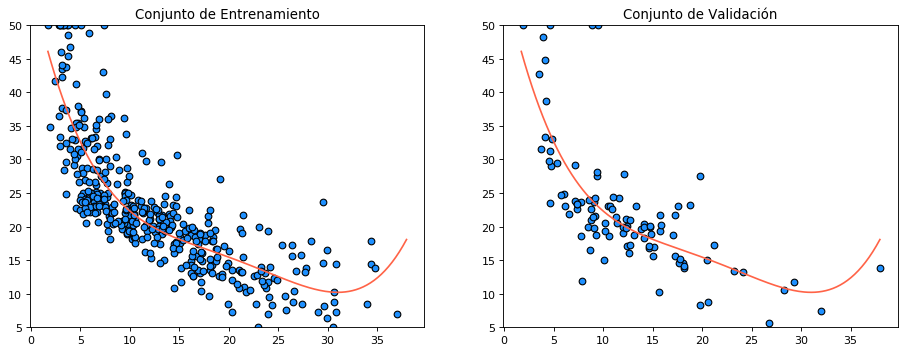

In [61]:
# EL SELECCIONADO POLINOMIO 
plt.figure(figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')

X_range_start = np.min(np.r_[X_train_f, X_test_f])
X_range_stop = np.max(np.r_[X_train_f, X_test_f])
y_range_start = np.min(np.r_[y_train, y_test])
y_range_stop = np.max(np.r_[y_train, y_test])
X_linspace = np.linspace(X_range_start, X_range_stop, 200).reshape(-1, 1)
X_linspace_poly = poly_features.transform(X_linspace)

# Conjunto de entrenamiento
plt.subplot(1, 2, 1)
plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.plot(X_linspace, model.predict(X_linspace_poly), color="tomato", label="modelo")
plt.ylim(y_range_start, y_range_stop)
plt.title("Conjunto de Entrenamiento")

# Conjunto de validación
plt.subplot(1, 2, 2)
plt.scatter(X_test_f, y_test, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.plot(X_linspace, model.predict(X_linspace_poly), color="tomato", label="modelo")
plt.ylim(y_range_start, y_range_stop)
plt.title("Conjunto de Validación")

plt.show()

In [62]:
Err_entrenamiento=[]
Err_validacion=[]
Err_entrenamiento=mean_squared_error(y_train, model.predict(X_poly_train))
Err_validacion=mean_squared_error(y_test, model.predict(X_poly_test))
Entrenamiento.append(round(Err_entrenamiento,2))
Validacion.append(round(Err_validacion,2))

In [63]:
print('Grado 5')
polynomial_degree = 5 # TODO: Probar distintos grados del polinomio

poly_features = PolynomialFeatures(polynomial_degree)
poly_features.fit(X_train_f)
X_poly_train = poly_features.transform(X_train_f)
X_poly_test = poly_features.transform(X_test_f)

model = LinearRegression()
model.fit(X_poly_train, y_train)

print('Media del error cuadrado para entrenamiento: %.2f' % 
      mean_squared_error(y_train, model.predict(X_poly_train)))
print('Media del error cuadrado para validación: %.2f' %
      mean_squared_error(y_test, model.predict(X_poly_test)))


Grado 5
Media del error cuadrado para entrenamiento: 25.03
Media del error cuadrado para validación: 34.83


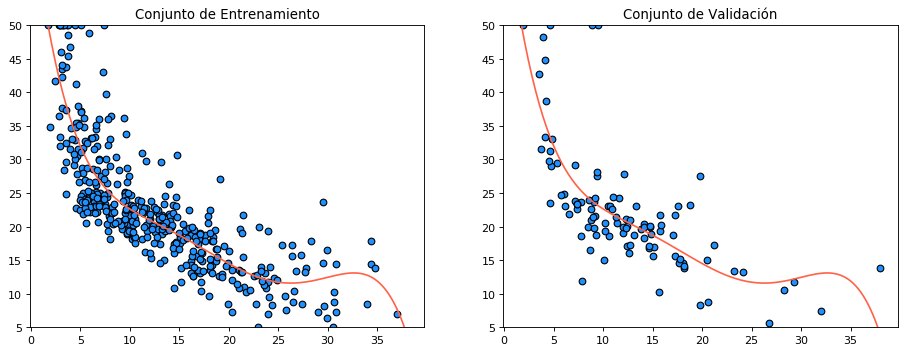

In [64]:
# EL SELECCIONADO POLINOMIO 
plt.figure(figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')

X_range_start = np.min(np.r_[X_train_f, X_test_f])
X_range_stop = np.max(np.r_[X_train_f, X_test_f])
y_range_start = np.min(np.r_[y_train, y_test])
y_range_stop = np.max(np.r_[y_train, y_test])
X_linspace = np.linspace(X_range_start, X_range_stop, 200).reshape(-1, 1)
X_linspace_poly = poly_features.transform(X_linspace)

# Conjunto de entrenamiento
plt.subplot(1, 2, 1)
plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.plot(X_linspace, model.predict(X_linspace_poly), color="tomato", label="modelo")
plt.ylim(y_range_start, y_range_stop)
plt.title("Conjunto de Entrenamiento")

# Conjunto de validación
plt.subplot(1, 2, 2)
plt.scatter(X_test_f, y_test, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.plot(X_linspace, model.predict(X_linspace_poly), color="tomato", label="modelo")
plt.ylim(y_range_start, y_range_stop)
plt.title("Conjunto de Validación")

plt.show()

In [65]:
Err_entrenamiento=[]
Err_validacion=[]
Err_entrenamiento=mean_squared_error(y_train, model.predict(X_poly_train))
Err_validacion=mean_squared_error(y_test, model.predict(X_poly_test))
Entrenamiento.append(round(Err_entrenamiento,2))
Validacion.append(round(Err_validacion,2))

In [66]:

print('Grado 6')
polynomial_degree = 6 # TODO: Probar distintos grados del polinomio

poly_features = PolynomialFeatures(polynomial_degree)
poly_features.fit(X_train_f)
X_poly_train = poly_features.transform(X_train_f)
X_poly_test = poly_features.transform(X_test_f)

model = LinearRegression()
model.fit(X_poly_train, y_train)

print('Media del error cuadrado para entrenamiento: %.2f' % 
      mean_squared_error(y_train, model.predict(X_poly_train)))
print('Media del error cuadrado para validación: %.2f' %
      mean_squared_error(y_test, model.predict(X_poly_test)))

Grado 6
Media del error cuadrado para entrenamiento: 25.01
Media del error cuadrado para validación: 34.33


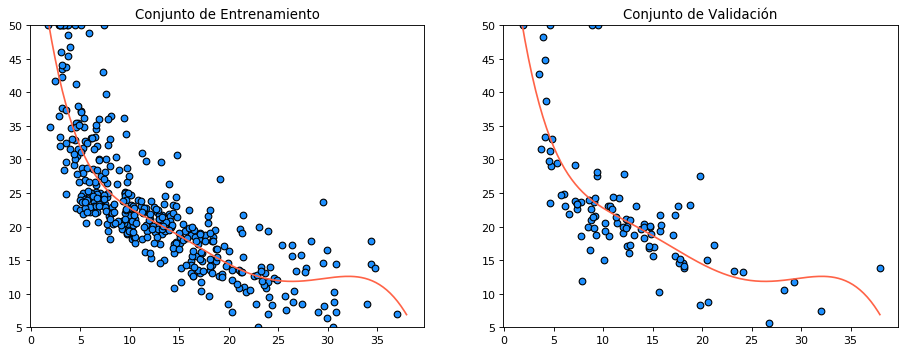

In [67]:
# EL SELECCIONADO POLINOMIO 
plt.figure(figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')

X_range_start = np.min(np.r_[X_train_f, X_test_f])
X_range_stop = np.max(np.r_[X_train_f, X_test_f])
y_range_start = np.min(np.r_[y_train, y_test])
y_range_stop = np.max(np.r_[y_train, y_test])
X_linspace = np.linspace(X_range_start, X_range_stop, 200).reshape(-1, 1)
X_linspace_poly = poly_features.transform(X_linspace)

# Conjunto de entrenamiento
plt.subplot(1, 2, 1)
plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.plot(X_linspace, model.predict(X_linspace_poly), color="tomato", label="modelo")
plt.ylim(y_range_start, y_range_stop)
plt.title("Conjunto de Entrenamiento")

# Conjunto de validación
plt.subplot(1, 2, 2)
plt.scatter(X_test_f, y_test, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.plot(X_linspace, model.predict(X_linspace_poly), color="tomato", label="modelo")
plt.ylim(y_range_start, y_range_stop)
plt.title("Conjunto de Validación")

plt.show()

In [68]:
Err_entrenamiento=[]
Err_validacion=[]
Err_entrenamiento=mean_squared_error(y_train, model.predict(X_poly_train))
Err_validacion=mean_squared_error(y_test, model.predict(X_poly_test))
Entrenamiento.append(round(Err_entrenamiento,2))
Validacion.append(round(Err_validacion,2))

Interpretacion del cambio de grado del polinomio

Se probaron con grados del 1 al 6, seleccionando el 4to grado como el mas optimo a simple vista.

Del 1 al 3 inclusive se veian mejoras en el Media del error cuadrado (disminuia)
Pero se podia identificar un caso de underfitting. 
Al probar el 5to grado se vio un comportamiento errático en los extremos de los datos de validacion (overfitting de los datos de train).
Al llegar al grado 6 este error fue aun mas grave por lo que se decidio seleccionar el 4to grado como el más optimo ya que se consigue un equilibrio en la media del error cuadrado tanto de train como de test.

In [71]:
Error_entrenamiento = Entrenamiento
Error_validacion = Validacion
Errores = pd.DataFrame(columns=['Error_entrenamiento', 'Error_validacion'])
Errores['Error_entrenamiento']= Error_entrenamiento
Errores['Error_validacion']= Error_validacion
Errores.rename(index={0:'m=1',1:'m=2', 2: 'm=3', 3: 'm=4', 4: 'm=5', 5: 'm=6'}, inplace=True)
Errores

,Error_entrenamiento,Error_validacion
m=1,36.52,46.34
m=2,28.19,38.85
m=3,26.78,37.22
m=4,25.85,34.70
m=5,25.03,34.83
m=6,25.01,34.33


## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

In [72]:
from sklearn.model_selection import train_test_split
X, y = boston['data'], boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((404, 13), (102, 13))

In [73]:
# 1. Resolver acá. Ayuda (con dos atributos):
selector = (boston['feature_names'] == 'RM') |(boston['feature_names'] == 'AGE') |(boston['feature_names'] == 'LSTAT')
X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape 

((404, 3), (102, 3))

In [74]:
# Entrenamos un clasificador utilizando sólo ese atributo sobre el conjunto de entrenamiento (X_train, y_train)
model = LinearRegression()
model.fit(X_train_fs, y_train)

# Evaluamos el desempeño del clasificador utilizando la media del error cuadrado (MSE o mean squared error)
# sobre el conjunto de datos de entrenamiento (X_train, y_train) y lo comparamos con el de validación (X_test, y_test)
# Mientras más cercano a cero mejor --
print('Media del error cuadrado para entrenamiento del atributo seleccionado: %.2f' % 
      mean_squared_error(y_train, model.predict(X_train_fs)))
print('Media del error cuadrado para validación del atributo seleccionado: %.2f' %
      mean_squared_error(y_test, model.predict(X_test_fs)))

Media del error cuadrado para entrenamiento del atributo seleccionado: 28.79
Media del error cuadrado para validación del atributo seleccionado: 37.30


In [76]:
polynomial_degree = 4


models = []
models_name = []
poly_features = []
for polynomial_degree in [1,2,3,4,5,6]:
    poly_features.append( PolynomialFeatures(polynomial_degree))
    poly_features[-1].fit(X_train_fs)
    X_poly_train = poly_features[-1].transform(X_train_fs)
    X_poly_test = poly_features[-1].transform(X_test_fs)

    models.append(LinearRegression())
    models[-1].fit(X_poly_train, y_train)
    models_name.append(f"Pol Regr N={polynomial_degree}")
    print("+"*10,models_name[-1],"+"*10)
    print('Media del error cuadrado para entrenamiento: %.2f' % 
          mean_squared_error(y_train, models[-1].predict(X_poly_train)))
    print('Media del error cuadrado para validación: %.2f' %
          mean_squared_error(y_test, models[-1].predict(X_poly_test)))
# Plots
#args = (X_train_fs, X_test_fs, y_train, y_test)
#regression_plots(list(zip(models, models_name)), *args, poly_features=poly_features)

#regression_plots(X_train_feature, X_val_feature, y_train, y_val, model, poly_features)

++++++++++ Pol Regr N=1 ++++++++++
Media del error cuadrado para entrenamiento: 28.79
Media del error cuadrado para validación: 37.30
++++++++++ Pol Regr N=2 ++++++++++
Media del error cuadrado para entrenamiento: 15.61
Media del error cuadrado para validación: 27.10
++++++++++ Pol Regr N=3 ++++++++++
Media del error cuadrado para entrenamiento: 13.37
Media del error cuadrado para validación: 27.14
++++++++++ Pol Regr N=4 ++++++++++
Media del error cuadrado para entrenamiento: 10.81
Media del error cuadrado para validación: 32.22
++++++++++ Pol Regr N=5 ++++++++++
Media del error cuadrado para entrenamiento: 9.58
Media del error cuadrado para validación: 40.92
++++++++++ Pol Regr N=6 ++++++++++
Media del error cuadrado para entrenamiento: 8.38
Media del error cuadrado para validación: 420.34


Coincidentemente en la regresion polinomial en el grado=4 también obtenemos una menor MSE que analizando 1 feature

## Más ejercicios (opcionales)

### Ejercicio 7: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.

### Ejercicio 8: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?


In [79]:
#7
# 1. Resolver acá. Ayuda (con dos atributos):
X, y = boston['data'], boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

selector = (boston['feature_names'] != 'MEDV')
X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train = X_train_fs
X_test = X_test_fs

for grado in range(1,8):
  model = make_pipeline(PolynomialFeatures(grado), LinearRegression())
  model.fit(X_train, y_train)

  train_error = mean_squared_error(y_train, model.predict(X_train))
  test_error = mean_squared_error(y_test, model.predict(X_test))
  print(f'\n\nUsando grado {grado}:')
  print(f'Train error: {train_error:2.2f}')
  print(f'Test error: {test_error:.2f}')



Usando grado 1:
Train error: 19.33
Test error: 33.45


Usando grado 2:
Train error: 6.31
Test error: 25.22


Usando grado 3:
Train error: 0.00
Test error: 1050370.60


Usando grado 4:
Train error: 0.00
Test error: 981357.44


Usando grado 5:
Train error: 0.00
Test error: 200225.49


Usando grado 6:
Train error: 0.00
Test error: 200922.26


Usando grado 7:
Train error: 0.00
Test error: 24855.36


++++++++++ Lineal Ridge Lambda=0.0001 ++++++++++
Media del error cuadrado para entrenamiento: 36.52
Media del error cuadrado para validación: 46.34
++++++++++ Lineal Ridge Lambda=0.001 ++++++++++
Media del error cuadrado para entrenamiento: 36.52
Media del error cuadrado para validación: 46.34
++++++++++ Lineal Ridge Lambda=0.01 ++++++++++
Media del error cuadrado para entrenamiento: 36.52
Media del error cuadrado para validación: 46.34


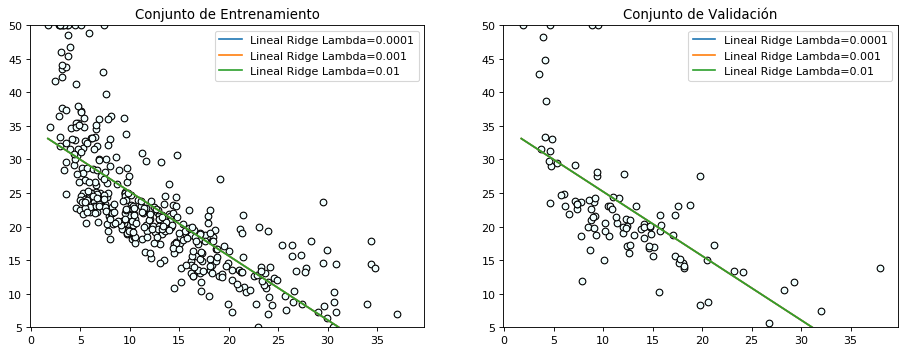

In [80]:
# TODO: Parámetro de regularización. También denominado como parámetro `lambda`.
alpha = 0

models = []
models_name = []
for alpha in [1e-4, 1e-3, 1e-2]:
    
    models.append(Ridge(alpha=alpha))
    models[-1].fit(X_train_f, y_train)
    models_name.append(f"Lineal Ridge Lambda={alpha}")
    print("+"*10,models_name[-1],"+"*10)
    print('Media del error cuadrado para entrenamiento: %.2f' % 
          mean_squared_error(y_train, models[-1].predict(X_train_f)))
    print('Media del error cuadrado para validación: %.2f' %
          mean_squared_error(y_test, models[-1].predict(X_test_f)))
# Plots
args = (X_train_f, X_test_f, y_train, y_test)
regression_plots(list(zip(models, models_name)), *args)

#regression_plots(X_train_feature, X_val_feature, y_train, y_val, model, poly_features)

Variar el alpha/lambda en Ridge solo tiene sentido si estamos utilizando más de un feature para predecir un label

In [81]:
from sklearn.linear_model import Ridge
import numpy as np

precision = 1e-5



for precision in [1e-8,1e-7,1e-6,1e-5, 1e-4, 1e-3]:
  model = Ridge(alpha=.5, normalize=True, tol=precision)
  model.fit(X_train, y_train)
  
  train_error = mean_squared_error(y_train, model.predict(X_train))
  test_error = mean_squared_error(y_test, model.predict(X_test))
  print(f'\n\nNormalizando, precision: {precision}')

  print(f'Train error: {train_error:2.2f}')
  print(f'Test error: {test_error:.2f}')

  model = Ridge(alpha=1, normalize=False, tol=precision)
  model.fit(X_train, y_train)

  train_error = mean_squared_error(y_train, model.predict(X_train))
  test_error = mean_squared_error(y_test, model.predict(X_test))
  print(f'\n\nSin normalizar:')
  print(f'Train error: {train_error:2.2f}')
  print(f'Test error: {test_error:.2f}')






Normalizando, precision: 1e-08
Train error: 23.29
Test error: 41.27


Sin normalizar:
Train error: 19.49
Test error: 34.23


Normalizando, precision: 1e-07
Train error: 23.29
Test error: 41.27


Sin normalizar:
Train error: 19.49
Test error: 34.23


Normalizando, precision: 1e-06
Train error: 23.29
Test error: 41.27


Sin normalizar:
Train error: 19.49
Test error: 34.23


Normalizando, precision: 1e-05
Train error: 23.29
Test error: 41.27


Sin normalizar:
Train error: 19.49
Test error: 34.23


Normalizando, precision: 0.0001
Train error: 23.29
Test error: 41.27


Sin normalizar:
Train error: 19.49
Test error: 34.23


Normalizando, precision: 0.001
Train error: 23.29
Test error: 41.27


Sin normalizar:
Train error: 19.49
Test error: 34.23
